# Dimensionality Reduction

## Topics:
* The Curse of Dimensionality
* Main Approaches
    * Projection
    * Manifold Learning
* PCA
    * Principal Components
    * Projecting Down to d Dimensions
    * Choosing the right number of Dimensions
    * PCA for Compression
    * Randomized PCA
    * Incremental PCA
    * Kernel PCA
    * LLE
* Other Techniques
    * Random Projections
    * Multidimensional Scaling (MDS)
    * Isomap
    * t-Distributed Stochastic Neighbor Embedding (t-SNE)
    * Linear Discriminant Analysis (LDA)

In [14]:
from sklearn.datasets import load_diabetes
import numpy as np

diabetes = load_diabetes()
X = diabetes['data']

**The Curse of Dimensionality**

The main goals of applying *Dimensionality Reduction* are:
* Speed up training: with fewer dimensions we can be faster in training our system
* Perform better: If we have features that only contribute (partially) with some noise to the prediction, get rid of them might increase the performance of the model
* Data Visualization: Makes it possible to plot a condensed view of a high-dimesional training set on graphs

High-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from any other training instance, making predictions much less reliable than in lower dimensions.

in short: *the more dimensions the training set has, the greater the risk of overfitting it*

**Main approaches for Dimensionality Reduction (DR)**

* Projection:
In real-world problems, training instances are not *spread out* uniformly across all dimensions or many features are almost constant (with low variability). As a result, all training instances are clore to lie within a much lower-dimesional *subspace* as a projection of the high-dimensional space.

* Manifold:
Is a non-linear projection into a lower-dimensional subspace

**PCA**

It identifies the hyperplane that lies closest to the data, and then it projects the data onto it.
It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections.

* Principal Components: There is a standard matrix factorization technique called *Singular Value Descomposition* (SVD) that can descompose the training set matrix **X** into the matrix multiplication of three matrices $U, \Sigma, V^{T}$, where **V** contains the unit vectors that define all the principal components we are looking for.

* Projecting Down to d Dimensions: (Or is it better to say *... onto the hyperplane defined by the first d principal components*). To do this we must compute the matrix multiplication of the training set matrix **X** by the matrix $W_{d}$ defined as the matrix containing the first d columns of **V**.

$X_{d-proj} = XW_{d}$

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.40242142, 0.14923182])

* Choosing the Right number of Dimesions:
Unless you are reducing dimensionality for visualization (2 or 3 dimensions), you should choose those dimensions that explain and add up large portions of the variance.

In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

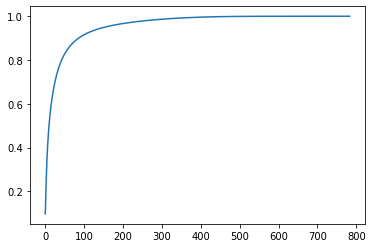

In [23]:
from matplotlib import pyplot as plt

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(cumsum);

In [24]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

* PCA for Compression: 
The following code compresses the MNIST dataset down to 154 dimensions, then uses the inverse_transform() method to decompress it back to 784 dimensions

In [25]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

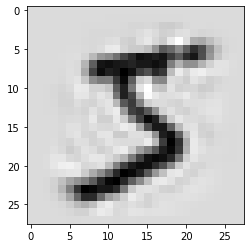

lable =  5


In [27]:
some_digit = X_recovered[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.show()
print('lable = ', y[0])

* Randomized PCA:
Scikit-Learn uses a stochastic algorithm that quickly (when *d* is much smaller than *n*) finds an approximation of the first *d* principal components.

In [29]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)

* Incremental PCA:
They allow you to split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. This is very usefull for large datasets and for applying PCA online.

In [30]:
from sklearn.decomposition import IncrementalPCA

n_batches = 10
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

* Kernel PCA:
Remember the Kernel trick? ...*mathematical technique tha implicitly maps instances into a high-dimensional space*
That way, a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the *original* space.

    The same trick can be applied to PCA making it possible to perfomr complex nonlinear projections for dimensionality reduction.
    
    There is no obvious  preformance measure to help you select the best kernel and hyperparameter values, so you can **grid search** to select the most convincing values.

In [11]:
from sklearn.datasets import make_swiss_roll

X, color = make_swiss_roll(n_samples=1500, noise=0.05, random_state=None)


In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components= 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

* LLE *Locally Linear Embedding*:
Is a powerfull *nonlinear* (Manifold -> does not rely on projection) dimensionality reduction technique. It works by first measuring how each training instance linearly relates to its closetst neighbors, and then looking for a low-dimentional representation of the training set where these local relationships are best preserved.

Text(0.5, 0.92, 'Original data')

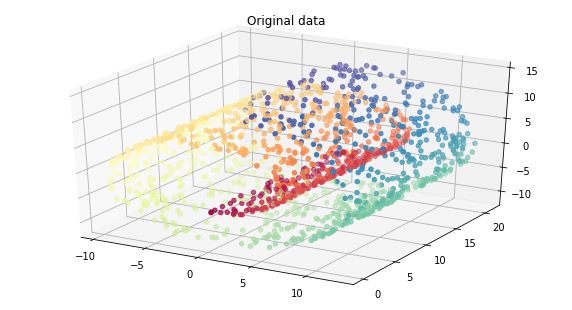

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

In [14]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_r = lle.fit_transform(X)

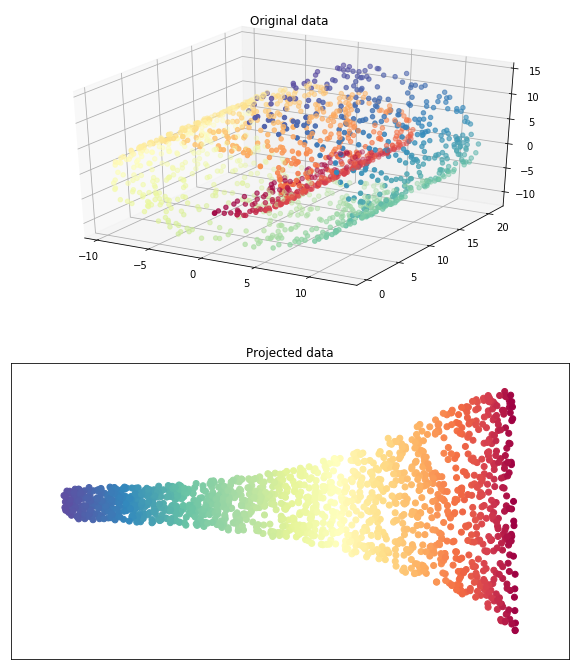

In [15]:
fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

**Other Dimensionality Reduction Techniques**

* Random Projections: Projects the data to a lower-dimensional space using random projections. Sounds crazy? it turns out that such random projections is actually very likely to preserve distances well [demostrated Mathematically](https://en.wikipedia.org/wiki/Johnson%E2%80%93Lindenstrauss_lemma).

```Python
from sklearn import random_projections
```
* Multidimensional Scaling (MDS): Reduces dimensionality while trying to preserve the distances between the instances
* Isomap: Creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the **geodesic distances** between the instances.
* t-Distributed Stochastic Neighbor Embedding (t-SNE): REduces dimensionality while trying to keep similar instaces close and dissimilar instances apart. Mostly use for visualization (clusters)
* Linear Discriminant Analysis (LDA): Classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. 